In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "yogeshkhandare56"
os.environ['KAGGLE_KEY'] = "ebd50ac954feccf8f92e6662994d22ff"


!kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020

100% 2.31G/2.31G [00:24<00:00, 92.4MB/s]
100% 2.31G/2.31G [00:24<00:00, 101MB/s] 


In [ ]:
!unzip indian-currency-note-images-dataset-2020.zip

Archive:  indian-currency-note-images-dataset-2020.zip
  inflating: Indian currency dataset v1/test/100_15.jpg  
  inflating: Indian currency dataset v1/test/100_20.jpg  
  inflating: Indian currency dataset v1/test/100_270.jpg  
  inflating: Indian currency dataset v1/test/100_3.jpg  
  inflating: Indian currency dataset v1/test/100_359.jpg  
  inflating: Indian currency dataset v1/test/100_371.jpg  
  inflating: Indian currency dataset v1/test/100_4.jpg  
  inflating: Indian currency dataset v1/test/100__371.jpg  
  inflating: Indian currency dataset v1/test/100__386.jpg  
  inflating: Indian currency dataset v1/test/100__389.jpg  
  inflating: Indian currency dataset v1/test/100__415.jpg  
  inflating: Indian currency dataset v1/test/100__427.jpg  
  inflating: Indian currency dataset v1/test/100__435.jpg  
  inflating: Indian currency dataset v1/test/100__437.jpg  
  inflating: Indian currency dataset v1/test/10__206.jpg  
  inflating: Indian currency dataset v1/test/10__247.jpg  


In [ ]:
import shutil

# Define the path to the folder you want to delete
folder_path = '/content/Indian currency dataset v1/validation/Background'  # Replace with the actual path of the folder

# Use shutil.rmtree to delete the folder and its contents
try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' has been successfully deleted.")
except FileNotFoundError:
    print(f"Folder '{folder_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


Folder '/content/Indian currency dataset v1/validation/Background' has been successfully deleted.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1/255)
train_dataset = train_datagen.flow_from_directory(
    '/content/Indian currency dataset v1/training',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

valid_dataset = validation_datagen.flow_from_directory(
    '/content/Indian currency dataset v1/validation',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
history = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10,
    validation_data=valid_dataset,
    validation_steps=len(valid_dataset)
)


Found 3173 images belonging to 7 classes.
Found 315 images belonging to 7 classes.
Epoch 1/10
100/100 [==============================] - 152s 2s/step - loss: 1.9992 - accuracy: 0.1869 - val_loss: 1.6799 - val_accuracy: 0.3175
Epoch 2/10
100/100 [==============================] - 147s 1s/step - loss: 1.6865 - accuracy: 0.3448 - val_loss: 1.3550 - val_accuracy: 0.4413
Epoch 3/10
100/100 [==============================] - 147s 1s/step - loss: 1.4566 - accuracy: 0.4431 - val_loss: 1.1856 - val_accuracy: 0.5619
Epoch 4/10
100/100 [==============================] - 147s 1s/step - loss: 1.3100 - accuracy: 0.5039 - val_loss: 1.1732 - val_accuracy: 0.5683
Epoch 5/10
100/100 [==============================] - 145s 1s/step - loss: 1.2432 - accuracy: 0.5430 - val_loss: 1.0473 - val_accuracy: 0.6032
Epoch 6/10
100/100 [==============================] - 147s 1s/step - loss: 1.1501 - accuracy: 0.5862 - val_loss: 0.9356 - val_accuracy: 0.6698
Epoch 7/10
100/100 [==============================] - 151s 

In [ ]:
model.save('currency_classification_model.h5')

In [ ]:
accuracy = model.evaluate(valid_dataset, steps=len(valid_dataset))[1]
print(f"Validation Accuracy: {accuracy*100}")

10/10 [==============================] - 9s 834ms/step - loss: 0.7976 - accuracy: 0.7270
Validation Accuracy: 72.69841432571411


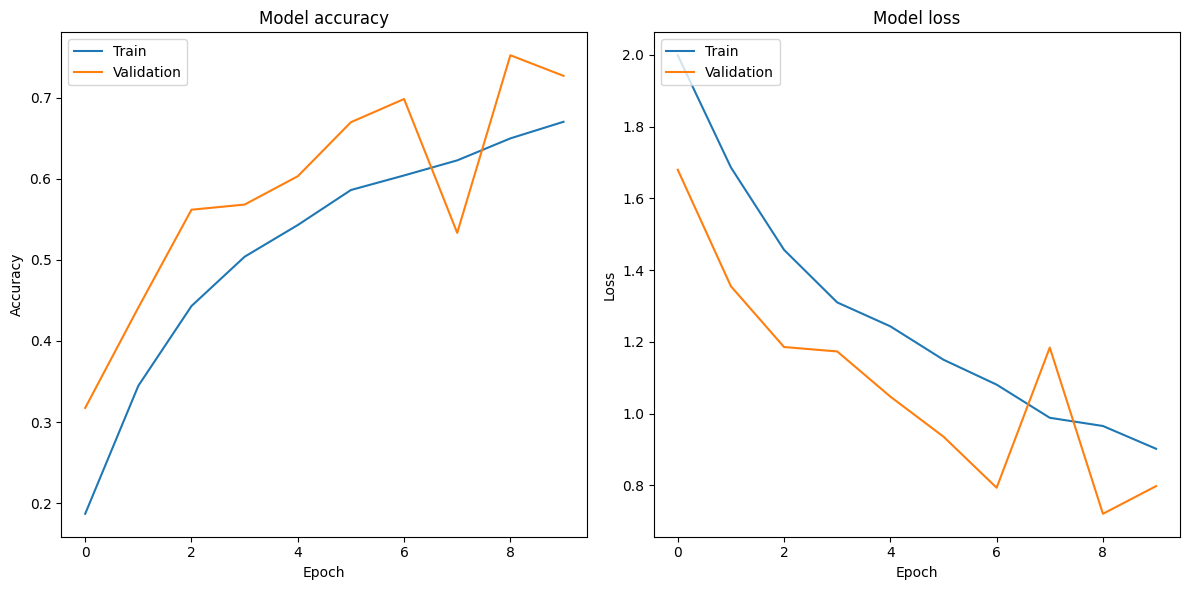

In [ ]:
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

plot_history(history)

1/1 [==============================] - 0s 178ms/step


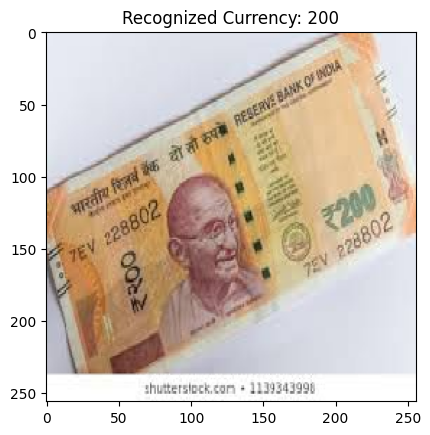

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('/content/currency_classification_model.h5')

def recognize_currency(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    currency_mapping = {
        0: '10',
        1: '100',
        2: '20',
        3: '200',
        4: '2000',
        5: '50',
        6: '500'
    }
    recognized_currency = currency_mapping.get(predicted_class, 'Unknown')
    return img, recognized_currency
image_path = '/content/Indian currency dataset v1/training/200/200.__0.jpg'
input_image, recognized_currency = recognize_currency(image_path)
plt.imshow(input_image)
plt.title(f'Recognized Currency: {recognized_currency}')
plt.show()


1/1 [==============================] - 0s 107ms/step


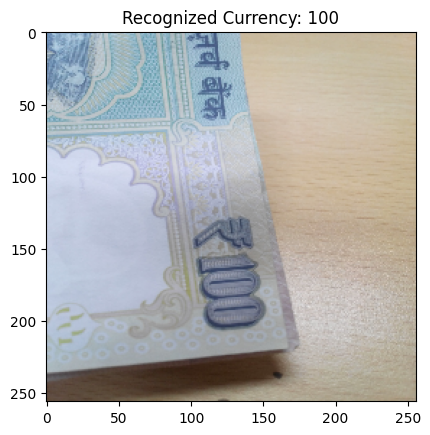

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('/content/currency_classification_model.h5')

def recognize_currency(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    currency_mapping = {
        0: '10',
        1: '100',
        2: '20',
        3: '200',
        4: '2000',
        5: '50',
        6: '500'
    }
    recognized_currency = currency_mapping.get(predicted_class, 'Unknown')
    return img, recognized_currency
image_path = '/content/Indian currency dataset v1/test/100_270.jpg'
input_image, recognized_currency = recognize_currency(image_path)
plt.imshow(input_image)
plt.title(f'Recognized Currency: {recognized_currency}')
plt.show()


1/1 [==============================] - 0s 69ms/step


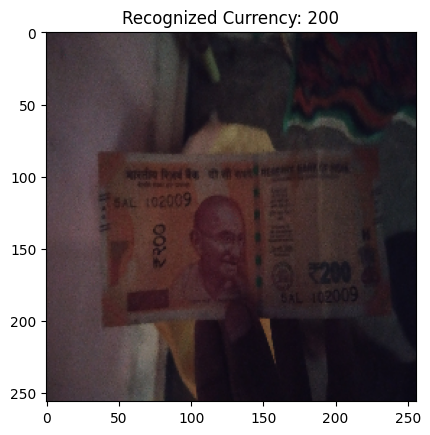

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('/content/currency_classification_model.h5')

def recognize_currency(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    currency_mapping = {
        0: '10',
        1: '100',
        2: '20',
        3: '200',
        4: '2000',
        5: '50',
        6: '500'
    }
    recognized_currency = currency_mapping.get(predicted_class, 'Unknown')
    return img, recognized_currency
image_path = '/content/Indian currency dataset v1/test/200.__254.jpg'
input_image, recognized_currency = recognize_currency(image_path)
plt.imshow(input_image)
plt.title(f'Recognized Currency: {recognized_currency}')
plt.show()


1/1 [==============================] - 0s 66ms/step


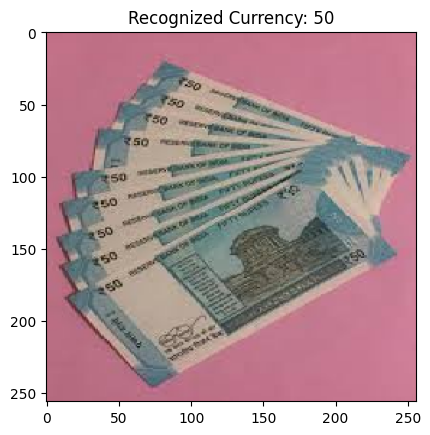

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
model = tf.keras.models.load_model('/content/currency_classification_model.h5')

def recognize_currency(image_path):
    img = image.load_img(image_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    currency_mapping = {
        0: '10',
        1: '100',
        2: '20',
        3: '200',
        4: '2000',
        5: '50',
        6: '500'
    }
    recognized_currency = currency_mapping.get(predicted_class, 'Unknown')
    return img, recognized_currency
image_path = '/content/Indian currency dataset v1/test/50__288.jpg'
input_image, recognized_currency = recognize_currency(image_path)
plt.imshow(input_image)
plt.title(f'Recognized Currency: {recognized_currency}')
plt.show()
